****    What if what happened in the movie is true ? ********

![https://upload.wikimedia.org/wikipedia/commons/7/75/Molly_brown_rescue_award_titanic.jpg](https://upload.wikimedia.org/wikipedia/commons/7/75/Molly_brown_rescue_award_titanic.jpg)

**I'm sorry, but I can't stop thinking about the actors in the film more than tragedy when I analyze this problem, so I have an idea that's a little crazy : if rescuers choose the people to be rescued based on whether they are single girls, married women and men. !!!!!!!!!! (sorry)  **

**I know it's crazy, but I'll still analyze this hypothesis**

**First of all, I look in the names to categorize people according to whether they are "Mr", "Miss" or "Mrs".
Then I will also take into consideration the person's Age and Class of Travel.**


In [ ]:
# loading the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors

In [ ]:
#loading of the necessary data
train = pd.read_csv("/kaggle/input/train.csv")
test = pd.read_csv("/kaggle/input/test.csv")
ytest = pd.read_csv('/kaggle/input/gender_submission.csv')
train.head()

**let's display some information that shows the importance of sex and class in the survival of passages**

In [ ]:
class_sex= train.groupby(['Pclass','Sex']).mean()
class_sex['Survived'].plot.bar()

In [ ]:
#some data cleaning
train['Age'].isna().sum()
train['Pclass'].isna().sum()
Age_mean = train['Age'].mean()
most_occuring_Pclass = train['Pclass'].value_counts().idxmax()
train['Age'] = train['Age'].fillna(Age_mean)
train['Pclass'] = train['Pclass'].fillna(most_occuring_Pclass)

**we create the matrix that groups the  "Mr", "Miss" or "Mrs"**

In [ ]:
NewX=np.ones(len(train))
for i in range(len(train)):
    if (train['Name'][i].find("Mr.") != -1) & (train['Name'][i].find("Miss.") == -1) & (train['Name'][i].find("Mrs.") == -1):
        NewX[i]=1
    else:
        if (train['Name'][i].find("Mr.") == -1) & (train['Name'][i].find("Miss.") == -1)  & (train['Name'][i].find("Mrs.") != -1):
            NewX[i]=2
        else:
                    if (train['Name'][i].find("Mr.") == -1) & (train['Name'][i].find("Miss.") != -1)  & (train['Name'][i].find("Mrs.") == -1):
                     NewX[i]=3
                    else:
                        if (train['Name'][i].find("Mr.") == -1) & (train['Name'][i].find("Miss.") == -1)  & (train['Name'][i].find("Mrs.") == -1):
                            NewX[i]=4

**on that we create the training matrix **

In [ ]:
X = np.matrix([np.ones(train.shape[0]),train['Pclass'].as_matrix(),train['Age'].as_matrix(),NewX]).T
y = np.matrix(train['Survived']).T

**Now we create the test matrix **

In [ ]:
test['Age'].isna().sum()
test['Pclass'].isna().sum()
Age_mean = test['Age'].mean()
most_occuring_Pclass = test['Pclass'].value_counts().idxmax()

test['Age'] = test['Age'].fillna(Age_mean)
test['Pclass'] = test['Pclass'].fillna(most_occuring_Pclass)

In [ ]:
X_test=np.ones(len(test))
for i in range(len(test)):
    if (test['Name'][i].find("Mr.") != -1) & (test['Name'][i].find("Miss.") == -1) & (test['Name'][i].find("Mrs.") == -1):
        X_test[i]=1
    else:
        if (test['Name'][i].find("Mr.") == -1) & (test['Name'][i].find("Miss.") == -1)  & (test['Name'][i].find("Mrs.") != -1):
            X_test[i]=2
        else:
                    if (test['Name'][i].find("Mr.") == -1) & (test['Name'][i].find("Miss.") != -1)  & (test['Name'][i].find("Mrs.") == -1):
                     X_test[i]=3
                    else:
                        if (test['Name'][i].find("Mr.") == -1) & (test['Name'][i].find("Miss.") == -1)  & (test['Name'][i].find("Mrs.") == -1):
                            X_test[i]=4

In [ ]:
X_d_test = np.matrix([np.ones(test.shape[0]),test['Pclass'].as_matrix(),test['Age'].as_matrix(),X_test]).T
y_test=ytest['Survived']

**The model we choose to use and the KNN**([https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm))

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

In [ ]:
print("Score of Model (%):", knn.score(X_d_test, y_test)*100)

**83% waw it's a very good score for my first submission on kaggle and for a crazy hypothesis  :) **
![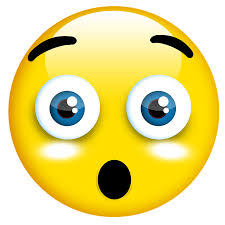](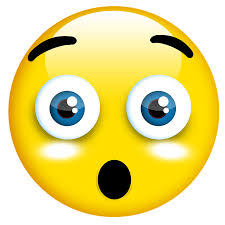)

**Precision  ?????**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
predictions = knn.predict(X_d_test)
print("Precision:", precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))
print("F1 Score:",f1_score(y_test, predictions))

**quick, quick, ... send the results quickly ;)**

In [ ]:
submission = pd.DataFrame({"PassengerId": test['PassengerId'],"Survived":predictions })
submission.to_csv("Submission.csv", index=False)

**Merci .................. chokran**